In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
##### outliers for wine servings

data=pd.read_csv("/content/beer-servings.csv",index_col='Unnamed: 0')
data

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,NaN,100.0,3.0,7.7,South America
189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,Yemen,6.0,0.0,0.0,0.1,Asia
191,Zambia,32.0,19.0,4.0,2.5,Africa


In [4]:


data['wine_servings']=data['wine_servings'].fillna(data['wine_servings'].median())


In [ ]:
data.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7acd38ece8f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7acd38ecee30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7acd38ece6e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7acd38ecf370>],
 'fliers': [<matplotlib.lines.Line2D at 0x7acd38ecf610>],
 'means': []}

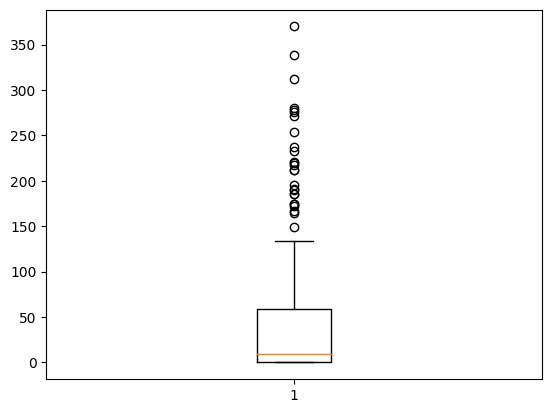

In [5]:
plt.boxplot(data['wine_servings'])

In [6]:
Q1=np.percentile(data['wine_servings'],25,method='midpoint')
Q2=np.percentile(data['wine_servings'],50,method='midpoint')
Q3=np.percentile(data['wine_servings'],75,method='midpoint')

In [7]:
print(" Q1 is ",Q1)
print(" Q2 is ",Q2)

print(" Q3 is ",Q3)


 Q1 is  1.0
 Q2 is  9.0
 Q3 is  59.0


In [8]:
IQR= Q3-Q1
IQR


58.0

In [9]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print("Lower Limit ", low_lim)
print("Upper Limit", up_lim)


Lower Limit  -86.0
Upper Limit 146.0


In [10]:
outlier=[]
for x in data['wine_servings']:
  if(x>up_lim) or (x<low_lim):
    outlier.append(x)

outlier

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [11]:
data['wine_servings']=data['wine_servings'].clip(lower=low_lim,upper=up_lim)

In [12]:
outlier=[]
for x in data['wine_servings']:
  if(x>up_lim) or (x<low_lim):
    outlier.append(x)

outlier

[]

{'whiskers': [<matplotlib.lines.Line2D at 0x7acd38df9c90>,
 'caps': [<matplotlib.lines.Line2D at 0x7acd38dfb580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7acd38dfaec0>],
 'medians': [<matplotlib.lines.Line2D at 0x7acd38dfbac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7acd38dfbd60>],
 'means': []}

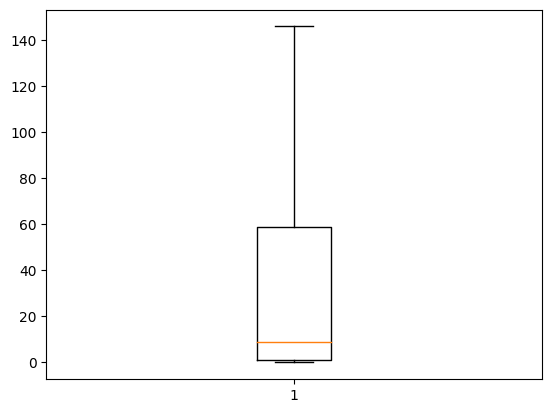

In [13]:
plt.boxplot(data['wine_servings'])


In [25]:
#### how to handle outliers using z score

data1=pd.read_csv("/content/beer-servings.csv",index_col='Unnamed: 0')
data1


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,NaN,100.0,3.0,7.7,South America
189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,Yemen,6.0,0.0,0.0,0.1,Asia
191,Zambia,32.0,19.0,4.0,2.5,Africa


In [34]:
data1.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [40]:
data1['beer_servings']=data1['beer_servings'].fillna(data['beer_servings'].median())
data1['spirit_servings']=data1['spirit_servings'].fillna(data['spirit_servings'].median())
data1['wine_servings']=data1['wine_servings'].fillna(data['wine_servings'].median())
data1['total_litres_of_pure_alcohol']=data1['total_litres_of_pure_alcohol'].fillna(data['total_litres_of_pure_alcohol'].median())

In [41]:
data1.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [42]:
mean = np.mean(data1['wine_servings'])
std = np.std(data1['wine_servings'])


In [43]:
print("Mean Value is : ", mean)
print("Standard deviation Value is : ", std)



Mean Value is :  48.8860103626943
Standard deviation Value is :  79.21098906557098


{'whiskers': [<matplotlib.lines.Line2D at 0x7acd2ef4b7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7acd38e29660>,
 'boxes': [<matplotlib.lines.Line2D at 0x7acd2ec6bcd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7acd2f272020>],
 'fliers': [<matplotlib.lines.Line2D at 0x7acd2f270280>],
 'means': []}

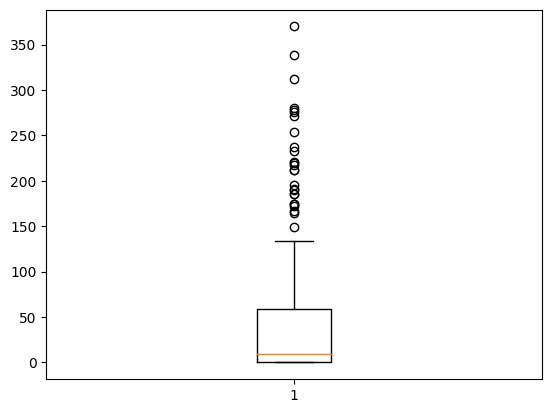

In [44]:
plt.figure()
plt.boxplot(data1['wine_servings'])


In [45]:
#### calculate z score

data2=data1['beer_servings']
threshold = 3
outlier = []
for i in data2:
	z = (i-mean)/std
	if z > threshold:
		outlier.append(i)
print('outlier in dataset is', outlier)


outlier in dataset is [295.0, 361.0, 347.0, 346.0, 313.0, 343.0, 376.0, 306.0, 343.0, 297.0]


{'whiskers': [<matplotlib.lines.Line2D at 0x7acd2ea65840>,
 'caps': [<matplotlib.lines.Line2D at 0x7acd2ea65d80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7acd2ea655a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7acd2ea662c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7acd2ea66560>],
 'means': []}

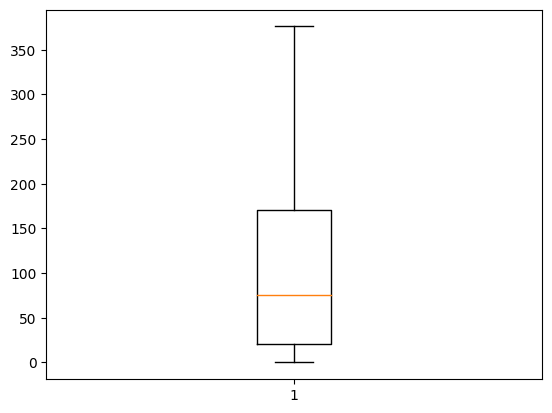

In [47]:
data['beer_servings']=data['beer_servings'].clip(lower=295.0,upper=361.0)
plt.boxplot(data1['beer_servings'])

In [ ]:
###### Spirit Servings

In [70]:
mean1 = np.mean(data1['spirit_servings'])
std1 = np.std(data1['spirit_servings'])

In [71]:
print("Mean Value is : ", mean1)
print("Standard deviation Value is : ", std1)



Mean Value is :  373.33678756476684
Standard deviation Value is :  4.666665388268477


{'whiskers': [<matplotlib.lines.Line2D at 0x7acd2e3be410>,
 'caps': [<matplotlib.lines.Line2D at 0x7acd2e3be830>,
 'boxes': [<matplotlib.lines.Line2D at 0x7acd2e3be170>],
 'medians': [<matplotlib.lines.Line2D at 0x7acd2e3bed70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7acd2e3bf010>],
 'means': []}

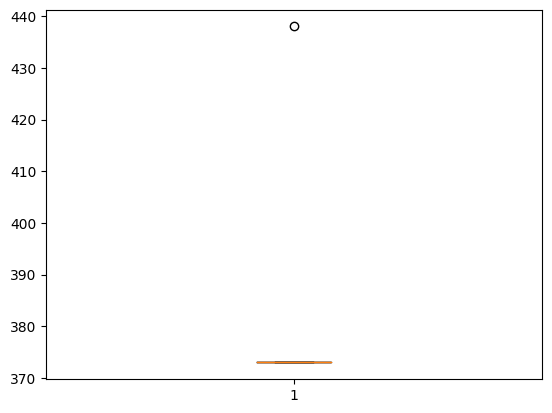

In [72]:
plt.boxplot(data1['spirit_servings'])

In [82]:
#### calculate z score

data2=data1['spirit_servings']
threshold = 3
outlier = []
for i in data2:
	z = (i-mean1)/std1
	if z > threshold:
		outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is [438.0]


{'whiskers': [<matplotlib.lines.Line2D at 0x7acd2e30bf70>,
 'caps': [<matplotlib.lines.Line2D at 0x7acd2e308340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7acd2e30ace0>],
 'medians': [<matplotlib.lines.Line2D at 0x7acd2e30ac80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7acd2e30a2c0>],
 'means': []}

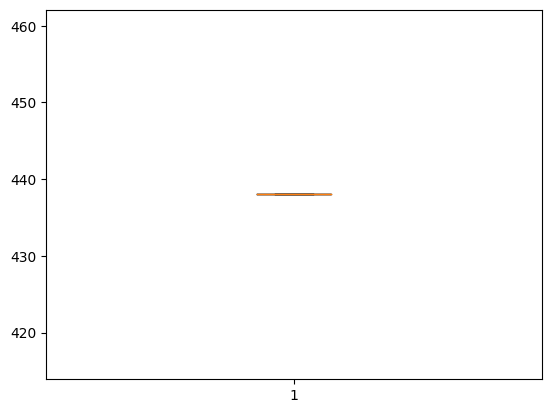

In [84]:
data1['spirit_servings']=data1['spirit_servings'].clip(438.0)
plt.boxplot(data1['spirit_servings'])